In [2]:
from uncertain_dp2 import *

In [3]:
from pot_correction import *
from experimenting_kit import *

In [4]:
import random
#random.seed(1)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
DNA_LENGTH = 50           
READ_lENGTH = 35
READ_COUNT = 10

PROBABILISTIC_ALIGNMENT_BONUS = 2
NORMAL_ALIGNMENT_BONUS = 0.7

ALIGNMENT_BONUS = PROBABILISTIC_ALIGNMENT_BONUS

In [6]:
dna = generate_dna(DNA_LENGTH)
reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]

In [7]:
reads[0].uncertain_text[0]

[0.9056992681521772, 0.04800141768867621, 0.0, 0.04629931415914644]

In [8]:
check_dna_distance_error_rate_suitable(dna, reads, alignment_bonus=ALIGNMENT_BONUS)

In [9]:
[print_read_intendet_errors(r,alignment_bonus=ALIGNMENT_BONUS) for r in reads]

              XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
     XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
  XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
      XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
            XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
        XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
  XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
       XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


[None, None, None, None, None, None, None, None, None, None]

In [10]:
corrected_reads = correct_reads_with_consens(reads,probabilistic=False, alignment_bonus=ALIGNMENT_BONUS)
[print_read_intendet_errors(r,alignment_bonus=ALIGNMENT_BONUS) for r in corrected_reads]

              XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
     XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
  XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
      XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
            XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
        XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
  XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
       XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


[None, None, None, None, None, None, None, None, None, None]

In [11]:
print(
f"                         before after\n"+\
f"local edit distance      {most_likely_restorer_error_rate(reads, alignment_bonus=ALIGNMENT_BONUS):.3f} {most_likely_restorer_error_rate(corrected_reads,alignment_bonus=ALIGNMENT_BONUS):.3f}\n"+\
f"arbitrary dna alignment  {dna_distance_error_rate(dna, reads, alignment_bonus=ALIGNMENT_BONUS):.3f} {dna_distance_error_rate(dna, corrected_reads, alignment_bonus=ALIGNMENT_BONUS):.3f}")

                         before after
local edit distance      0.160 0.057
arbitrary dna alignment  0.171 0.057


[0.16285714285714287, 0.14857142857142858, 0.15714285714285714, 0.20285714285714285] [0.06, 0.045714285714285714, 0.008571428571428572, 0.07428571428571429] [0.02, 0.054285714285714284, 0.008571428571428572, 0.0]


<BarContainer object of 3 artists>

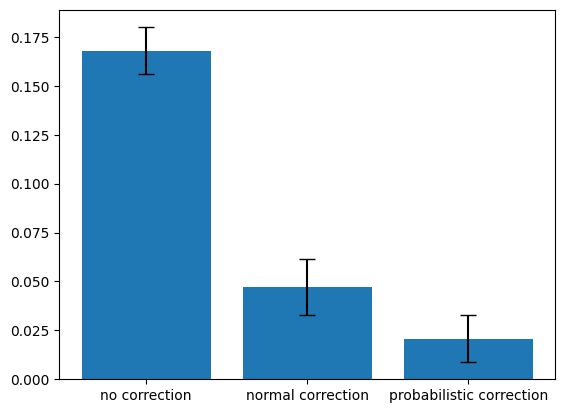

In [12]:

before_correction = []
normal_correction = []
probabilistic_correction = []

for i in range(4):

    dna = generate_dna(DNA_LENGTH)
    reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]

    corrected_reads = correct_reads_with_consens(reads,probabilistic=False, alignment_bonus=NORMAL_ALIGNMENT_BONUS)
    probabilistic_corrected_reads = correct_reads_with_consens(reads,probabilistic=True, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS)

    before_correction.append(dna_distance_error_rate(dna, reads, alignment_bonus=NORMAL_ALIGNMENT_BONUS))
    normal_correction.append(dna_distance_error_rate(dna, corrected_reads, alignment_bonus=NORMAL_ALIGNMENT_BONUS))
    probabilistic_correction.append(dna_distance_error_rate(dna, probabilistic_corrected_reads, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS))

print(before_correction, normal_correction, probabilistic_correction)


plt.bar(
    ["no correction", "normal correction", "probabilistic correction"],
    [np.mean(before_correction), np.mean(normal_correction), np.mean(probabilistic_correction)],
    yerr=[pd.Series(before_correction).sem(),pd.Series(normal_correction).sem(), pd.Series(probabilistic_correction).sem()],
    capsize=6
    )
#plt.ylim(0,0.02)


[[0.11836734693877551,
  0.15510204081632653,
  0.15510204081632653,
  0.1510204081632653,
  0.1673469387755102],
 [0.0326530612244898,
  0.11428571428571428,
  0.036734693877551024,
  0.02040816326530612,
  0.02857142857142857],
 [0.00816326530612245,
  0.0653061224489796,
  0.04081632653061224,
  0.0,
  0.012244897959183673]]

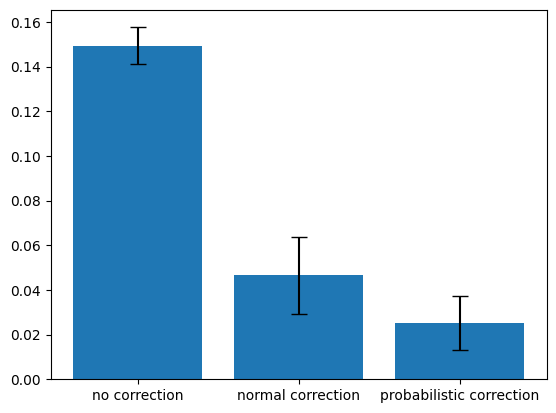

In [11]:
compare_and_plot(
    [
        lambda reads: reads,
        lambda reads: correct_reads_with_consens(reads,probabilistic=False, alignment_bonus=NORMAL_ALIGNMENT_BONUS),
        lambda reads: correct_reads_with_consens(reads,probabilistic=True, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS)
    ],
    names=["no correction","normal correction", "probabilistic correction"],
    iterations=5,
    measurement_alignment_boni=[NORMAL_ALIGNMENT_BONUS, NORMAL_ALIGNMENT_BONUS, PROBABILISTIC_ALIGNMENT_BONUS],
    environment=Environment(
    ).set_coverage(5)
)

In [ ]:
# boni = [0.2,0.4,0.6,0.8,1]
# data = [[] for _ in range(len(boni))]
# 
# 
# for i in range(4):
    # dna = generate_dna(DNA_LENGTH)
    # reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]
    #probabilistic_corrected_reads = correct_reads_with_consens(reads,probabilistic=True, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS)
    # for j in range(len(boni)):
        # corrected_reads = correct_reads_with_consens(reads, probabilistic=False, alignment_bonus=boni[j])
        # data[j].append(dna_distance_error_rate(dna, corrected_reads, alignment_bonus=boni[j]))
# 
# data

In [ ]:
# plt.bar(
    # [str(b) for b in boni],
    # [np.mean(boni_data) for boni_data in data],
    # yerr=[pd.Series(boni_data).sem() for boni_data in data],
    # capsize=6
    # )

In [ ]:
import time




with MeasureTime() as timer:
    time.sleep(1)

print(f"Die Ausführung hat {timer.elapsed_time} Sekunden gedauert.")

Die Ausführung hat 1.0012495517730713 Sekunden gedauert.
